<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/okid_deposit_indexes_RUB.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install okama

## Доходность депозитов в рублях. Итоги за 10 лет

---

- Полная версия статьи доступна на сайте проекта [Рост сбережений](https://rostsber.ru/publish/banks/deposits/okid_10y.html)
- Репозиторий проекта [okama на GitHub](https://github.com/mbk-dev/okama)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

Создаем список активов из:

- Индекс депозитов в рублях TOP10 (OKID10.INDX)
- Индекс депозитов в рублях (OKID.INDX)
- Индекс облигаций федерального займа Московской биржи полной доходности (RGBITR.INDX)

Базовая валюта - рубли (RUB).

*Для расчетов индексов OKID используются исторические данные по лучшим ставкам вкладом в рублях банков ТОР-10 и всех российских банков банков.*

In [2]:
bk = ok.AssetList(['OKID10.INDX', 'OKID.INDX', 'RGBITR.INDX'], ccy='RUB')
bk

symbols          [OKID10.INDX, OKID.INDX, RGBITR.INDX]
currency                                           RUB
first_date                                     2010-07
last_date                                      2021-04
period_length                      10 years, 10 months
inflation                                     RUB.INFL
dtype: object

In [3]:
bk.names

{'OKID10.INDX': 'Russian bank deposit index OKID - TOP10 banks (RUB)',
 'OKID.INDX': 'Russian bank deposit index OKID - all banks (RUB)',
 'RGBITR.INDX': 'Russian Government Bond Index'}

In [4]:
df = bk.wealth_indexes

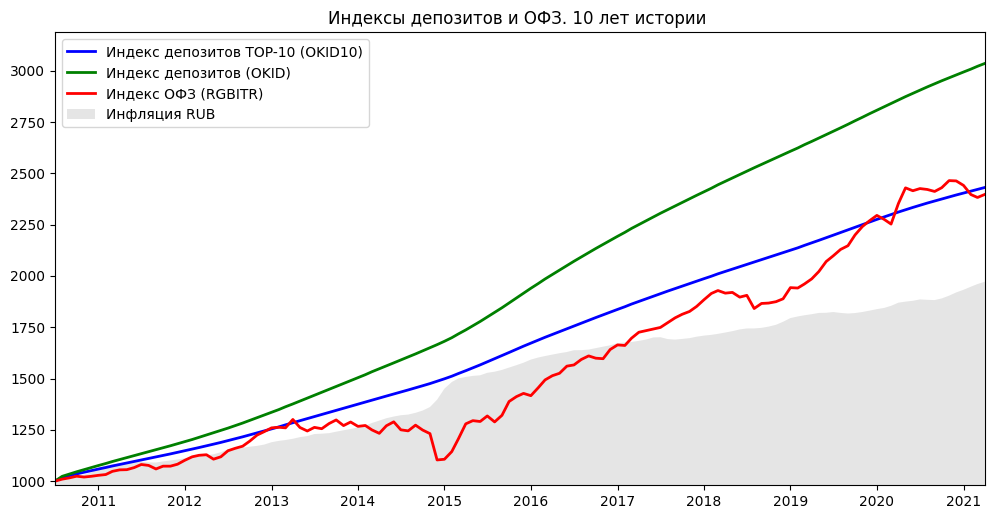

In [5]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['OKID10.INDX'], color = 'blue', linewidth = 2, label='Индекс депозитов TOP-10 (OKID10)')
ax.plot(df.index.to_timestamp(), df['OKID.INDX'], color = 'green', linewidth = 2, label='Индекс депозитов (OKID)')
ax.plot(df.index.to_timestamp(), df['RGBITR.INDX'], color = 'red', linewidth = 2, label='Индекс ОФЗ (RGBITR)')

ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2010-07', '2021-04')
ax.set_ylim(980,)
ax.set_title('Индексы депозитов и ОФЗ. 10 лет истории ')
leg = ax.legend()

In [4]:
df = bk.get_rolling_cagr(window=12, real=True)

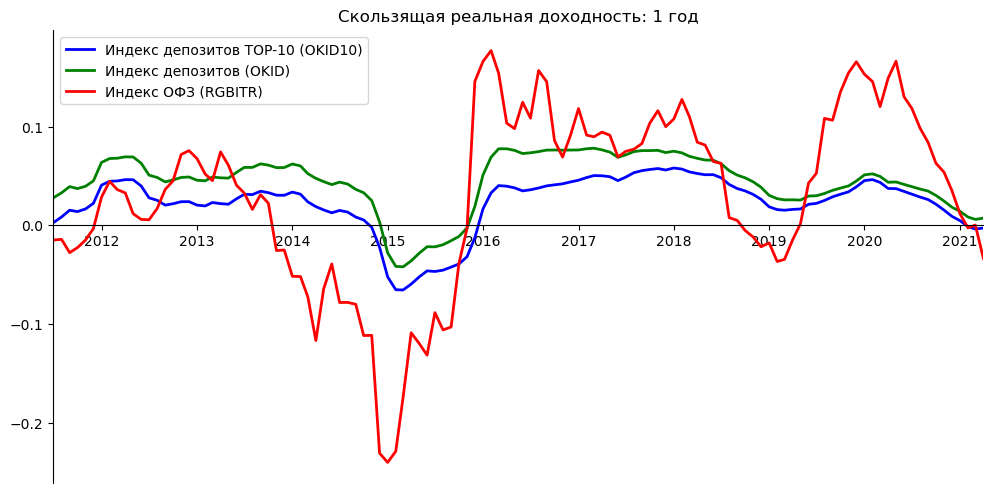

In [5]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['OKID10.INDX'], color = 'blue', linewidth = 2, label='Индекс депозитов TOP-10 (OKID10)')
ax.plot(df.index.to_timestamp(), df['OKID.INDX'], color = 'green', linewidth = 2, label='Индекс депозитов (OKID)')
ax.plot(df.index.to_timestamp(), df['RGBITR.INDX'], color = 'red', linewidth = 2, label='Индекс ОФЗ (RGBITR)')

# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2011-07', '2021-04')
# ax.set_ylim(980,)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_title('Скользящая реальная доходность: 1 год')
leg = ax.legend()

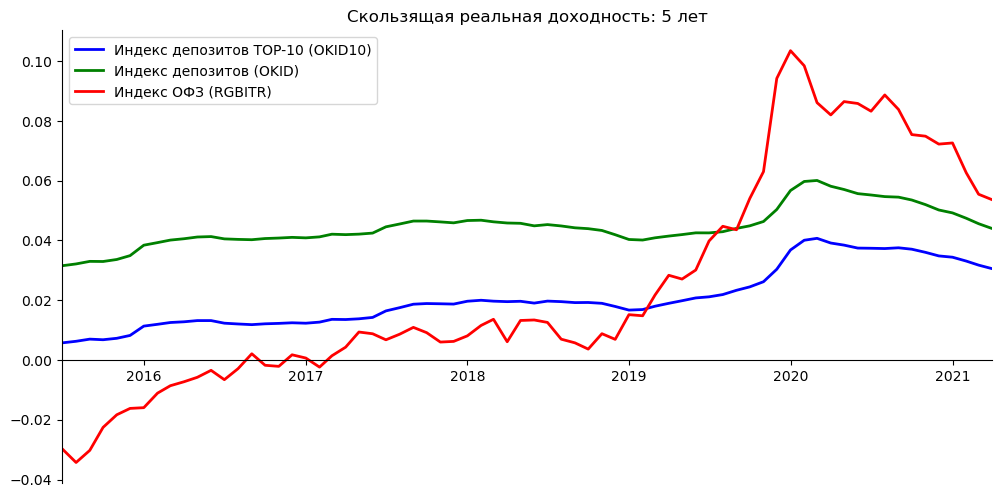

In [6]:
df = bk.get_rolling_cagr(window=12*5, real=True)

fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['OKID10.INDX'], color = 'blue', linewidth = 2, label='Индекс депозитов TOP-10 (OKID10)')
ax.plot(df.index.to_timestamp(), df['OKID.INDX'], color = 'green', linewidth = 2, label='Индекс депозитов (OKID)')
ax.plot(df.index.to_timestamp(), df['RGBITR.INDX'], color = 'red', linewidth = 2, label='Индекс ОФЗ (RGBITR)')

# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2015-07', '2021-04')
# ax.set_ylim(980,)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_title('Скользящая реальная доходность: 5 лет')
leg = ax.legend()

### Статистика доходности и риска индексов за последние 1, 5, 8 и 10 лет

In [9]:
bk.describe([1, 5, 8])

,property,period,OKID.INDX,OKID10.INDX,RGBITR.INDX,inflation
0,Compound return,YTD,0.0187301,0.0152868,-0.0266829,0.0271715
1,CAGR,1 years,0.0623109,0.0517892,0.0188514,0.0545641
2,CAGR,5 years,0.0862366,0.0722609,0.0962636,0.0404852
3,CAGR,8 years,0.103912,0.0829986,0.079423,0.0633058
4,CAGR,"10 years, 10 months",0.107922,0.0854462,0.084046,0.0646753
5,Dividend yield,LTM,0,0,0,NaN
6,Risk,"10 years, 10 months",0.0079715,0.00514161,0.0694251,NaN
7,CVAR,"10 years, 10 months",-0.0657181,-0.0556739,0.0824561,NaN
8,Max drawdowns,"10 years, 10 months",0,0,-0.151628,NaN
9,Max drawdowns dates,"10 years, 10 months",2010-07,2010-07,2014-12,NaN


### Историческая информация по ставкам российских банков в рублях

Краткая информация о том, как получить исходные данные по лучшим ставкам российских банков.

In [10]:
ok.symbols_in_namespace('RATE')

,symbol,ticker,name,country,exchange,currency,type
0,RUS_EUR.RATE,RUS_EUR.RATE,Max deposit rates (EUR) in Russian banks,Russia,RATE,EUR,Bank rates
1,RUS_RUB.RATE,RUS_RUB.RATE,Max deposit rates (RUB) in Russian banks,Russia,RATE,RUB,Bank rates
2,RUS_RUB_TOP10.RATE,RUS_RUB_TOP10.RATE,Max deposit rates (RUB) in TOP-10 Russian banks,Russia,RATE,RUB,Bank rates
3,RUS_USD.RATE,RUS_USD.RATE,Max deposit rates (USD) in Russian banks,Russia,RATE,USD,Bank rates


In [11]:
rub = ok.Rate('RUS_RUB.RATE').values_ts
rub10 = ok.Rate('RUS_RUB_TOP10.RATE').values_ts

In [12]:
rub10

date
2009-07    0.1484
2009-08    0.1477
2009-09    0.1459
2009-10    0.1427
2009-11    0.1366
            ...  
2021-01    0.0449
2021-02    0.0451
2021-03    0.0457
2021-04    0.0472
2021-05    0.0494
Freq: M, Name: RUS_RUB_TOP10.RATE, Length: 143, dtype: float64

Text(0.5, 1.0, 'Лучшие ставки депозитов в рублях')

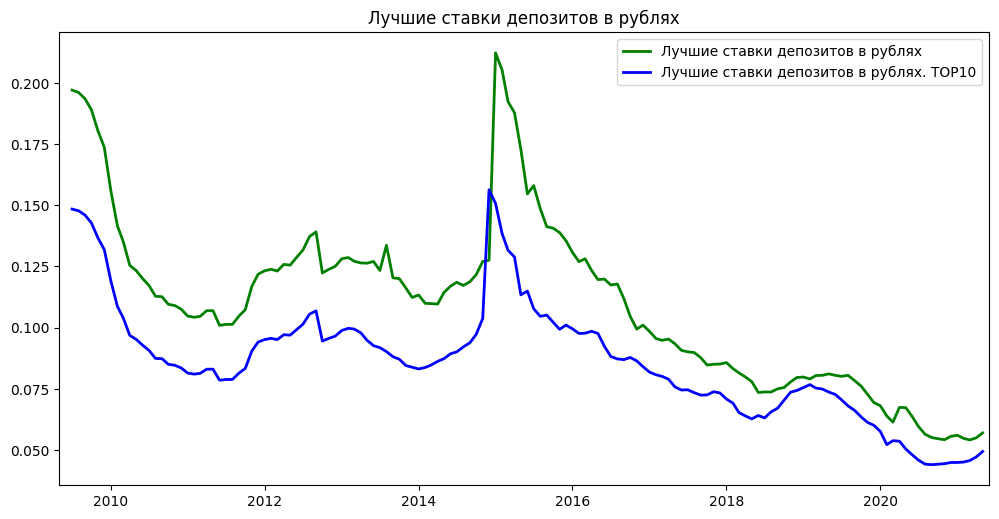

In [13]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(rub.index.to_timestamp(), rub.values, color = 'green', linewidth = 2, label='Лучшие ставки депозитов в рублях')
ax.plot(rub10.index.to_timestamp(), rub10.values, color = 'blue', linewidth = 2, label='Лучшие ставки депозитов в рублях. TOP10')
# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2009-05', '2021-06')
leg = ax.legend()
ax.set_title('Лучшие ставки депозитов в рублях')

In [14]:
usd = ok.Rate('RUS_USD.RATE').values_ts
eur = ok.Rate('RUS_EUR.RATE').values_ts

Text(0.5, 1.0, 'Лучшие ставки депозитов в USD и EUR')

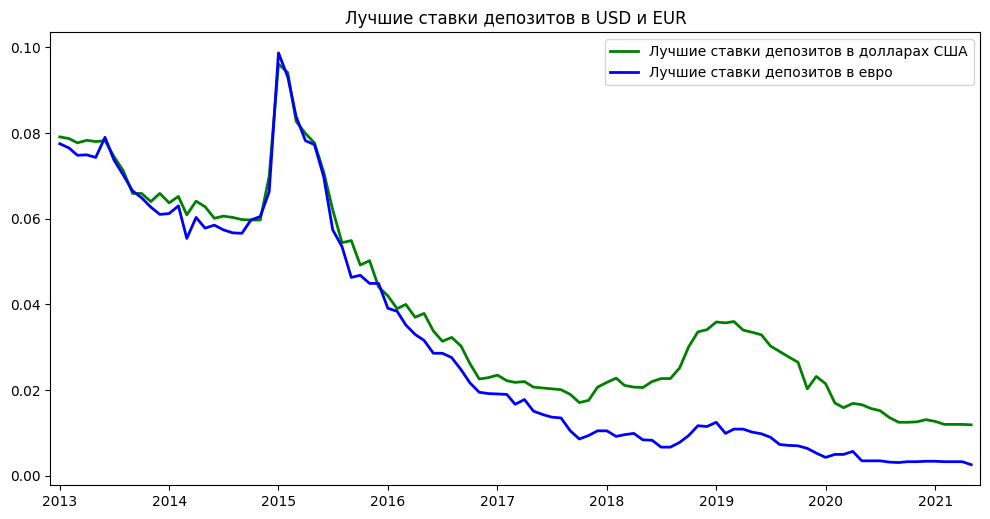

In [15]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(usd.index.to_timestamp(), usd.values, color = 'green', linewidth = 2, label='Лучшие ставки депозитов в долларах США')
ax.plot(eur.index.to_timestamp(), eur.values, color = 'blue', linewidth = 2, label='Лучшие ставки депозитов в евро')
# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2012-12', '2021-06')
leg = ax.legend()
ax.set_title('Лучшие ставки депозитов в USD и EUR')